<a href="https://colab.research.google.com/github/olegtyulyaev/--2/blob/main/AB_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A/B - тесты**


## Домашнее задание №5

**Задача 5.1.**

Вы провели эксперимент c упрощением формы заказа в магазине Утконос и получили результаты по метрике конверсий в покупку. Выберите метод оценки и оцените есть ли стат.значимые различия между конверсиями в двух группах при alpha = 5%. Дайте краткие рекомендации команде .Результаты:

1)Число юзеров в группах , которые заходили на сайт в период эксперимента: n1 = 15550 и n2 = 15550 .

2) Число юзеров в группах , которые совершили хотя бы одну покупку за период эксперимента: n1 = 164 и n2 = 228 3) Конверсии : conv1 = 1.05% conv2 = 1.47% .

In [ ]:

import numpy as np
import statsmodels.stats.proportion as smp

In [ ]:
alpha = 0.05
sale = np.array([164, 228])
views = np.array([15550, 15550])

zstat, pvalue = smp.proportions_ztest(count=sale, nobs=views, value=0, alternative='two-sided')
print(f'z-статистика: {zstat: .4f}')
print(f'p-value: {pvalue: .4f}')

z-статистика: -3.2531
p-value:  0.0011


***Ответ:***

Очень низкая (отрицательная) z-оценка, связанные с очень маленькими p-значениями -> значения располагаются в хвосте нормального распределения.  Наблюдаемая  модель отражает маловероятную закономерность, нулевую гипотезу надо отвергнуть.

*Наблюдаются статистически занчимые различия между А и В*

---

Новая форма заказа существенно увеличила коэффициент конверсии. Вариант  на 39,02% эффективнее, чем коэффициент конверсии варианта A (1,05%). Целесообразно изменение применить для всего продукта.

**Задача *5.2*.**

Сравниваем метрику конверсия в покупку. Размер выборки - 10000 элементов в каждой группе . Какой статистический критерий тут лучше всего подойдёт и почему ?

***Ответ:***

Для метрик конверсии в группах лучше всего подойдет
критерий Хи-квадрат на однородность
или Z-критерий долей.
Объем выборки 10000 достаточно большой,
поэтому мы можем предполагать проявление нормального распределения.


## Домашнее задание №6

**Задача 6.1.**

Продакт на главной mail.ru решил протестировать в рекомендательной ленте контента вместо карточек со статьями видеоплеер с короткими видео. Нынешний таймспент на юзера в день в среднем равен 25 минут, а стандартная ошибка (SD) равна 156. Мы предполагаем, что в новой версии таймспент на юзера в день изменится на 10%. Средний трафик 20000 человек в день. Посчитайте сколько дней необходимо держать эксперимент при alpha = 5% и beta = 20%.

In [ ]:
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import tt_ind_solve_power, zt_ind_solve_power
from statsmodels.stats.meta_analysis import effectsize_smd

import warnings
warnings.filterwarnings('ignore')


In [ ]:
Mx, SDx, My, n = 25, 156, 25*1.1, 20000
alpha = 0.05
beta = 0.2
effect_size = effectsize_smd(Mx, SDx, n, My, SDx, n)[0]
effect_size

-0.016025340527968824

In [ ]:
int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=(1 - beta))) * 2 / n

6.1126

***Ответ:***

Для эксперимента необходимо 6,12 дней (округленно неделя)

[Подтверждено калькулятором statulator.com](https://statulator.com/SampleSize/ss2M.html)

**Задача 6.2.**

Наша продуктовая команда в ecommerce магазине планирует запустить тест, направленный на ускорение загрузки сайта. Одна из основных метрик bounce rate в GA = 40%. Мы предполагаем, что при оптимизации сайта она изменится минимум на 20%.Средний трафик 4000 человек в день. Посчитайте сколько нам нужно дней держать эксперимент при alpha = 5% и beta = 20%

In [ ]:
p1, p2 = 0.4, 0.4*(0.8)
alpha = 0.05
beta = 0.2
n = 4000

In [ ]:
effect_size = proportion_effectsize(p1, p2)
effect_size

0.16690997264630902

In [ ]:
int(zt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=(1 - beta))) * 2 / n

0.2815

***Ответ:***

Для эксперимента необходимо 0,28 дней (округленно 1 день)
[Калькулятор evanmiller.org](https://www.evanmiller.org/ab-testing/sample-size.html) показывает, что при baseline 40% и диагностируемом измении в 20% нужна выборка в 592. Соотвественно 592/ 4000 / 2 = 0,29 надо чтобы прогнать половину трафика по сценарию.


## Домашнее задание №8

**Задача 8.1.**

На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns


from scipy.stats import norm, t, kstest, shapiro
import statsmodels.api as sm
from matplotlib import pyplot as plt

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
from statsmodels.stats.power import TTestIndPower

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [19]:
df = pd.read_excel('/content/AB_Test_Results.xlsx')
df.head(15)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.00
1,2423,control,0.00
2,9411,control,0.00
3,7311,control,0.00
4,6174,variant,0.00
5,2380,variant,0.00
6,2849,control,0.00
7,9168,control,0.00
8,6205,variant,0.00
9,7548,control,0.00


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['USER_ID'].plot(kind='hist', bins=20, title='USER_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['REVENUE'].plot(kind='hist', bins=20, title='REVENUE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('VARIANT_NAME').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='USER_ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='USER_ID', y='REVENUE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['USER_ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('VARIANT_NAME')):
  _plot_series(series, series_name, i)
  fig.legend(title='VARIANT_NAME', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('USER_ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['REVENUE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('VARIANT_NAME')):
  _plot_series(series, series_name, i)
  fig.legend(title='VARIANT_NAME', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('REVENUE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('VARIANT_NAME')):
  _plot_series(series, series_name, i)
  fig.legend(title='VARIANT_NAME', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['USER_ID'].plot(kind='line', figsize=(8, 4), title='USER_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['REVENUE'].plot(kind='line', figsize=(8, 4), title='REVENUE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['VARIANT_NAME'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='VARIANT_NAME', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['VARIANT_NAME'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='USER_ID', y='VARIANT_NAME', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['VARIANT_NAME'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='REVENUE', y='VARIANT_NAME', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [21]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [22]:
#распределение по группам
df.groupby('VARIANT_NAME')['USER_ID'].count().reset_index()

,VARIANT_NAME,USER_ID
0,control,4984
1,variant,5016


In [23]:
# Удалим строки с пропущенными значениями в 'REVENUE'
df_cleaned = df.dropna(subset=['REVENUE'])
# Подсчет количества положительных значений дохода
count_positive_revenue = (df_cleaned['REVENUE'] > 0).sum()
print("Количество строк с положительным доходом:", count_positive_revenue)

Количество строк с положительным доходом: 152


In [24]:
#подсчет кол-во вхождений пользователей в группы
variants = df.groupby('USER_ID', as_index = False).agg({'VARIANT_NAME': pd.Series.nunique})

In [25]:
#очистка групп от дубликатов
df = df[~df.USER_ID.isin(variants.query('VARIANT_NAME > 1').USER_ID)].copy(deep = True)

In [26]:
#распределение по группам
df.groupby('VARIANT_NAME')['USER_ID'].count().reset_index()

,VARIANT_NAME,USER_ID
0,control,3026
1,variant,3044


Распределение по группам имеет много дублей. После очистки контрольная группа уменьшилась с 4984 до 3026, тестовая соотвественно с 5016 до 3044. В выьорке базово большие проблемы были с сэмплированием участников

In [27]:
#статистика по группам
df.groupby('VARIANT_NAME')['REVENUE'].describe().reset_index()

,VARIANT_NAME,count,mean,std,min,25%,50%,75%,max
0,control,3026.0,0.155506,3.708620,0.0,0.0,0.0,0.0,196.01
1,variant,3044.0,0.058909,0.760344,0.0,0.0,0.0,0.0,23.04


Статистика по групам в разрезе параметра revenue, после преобразований данных, сильно разнится в % как в части среднего значения, так и в части стандартного отклонения.

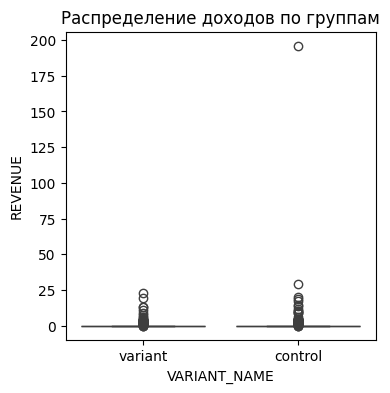

In [28]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=df)
plt.title('Распределение доходов по группам')
plt.show()

Статистику контрольного варианта могут сильно искажать выбросы по выручке.

**Проверка распределения на нормальность**

Шапиро-Уилко - для воборок до 5 000 наблюдений.

In [29]:
alpha = 0.05
st = shapiro(df.REVENUE)
print('Discription is {}normal\n'.format( {True: 'not ',
False: ''}[st[1] < alpha]));



Discription is not normal



Статистика подтверждает, что выручка распределена не нормально в группах

In [30]:
#добавим доп столбец для следующих расчетов

df['PURCHASE'] = df['REVENUE'].apply(lambda x: x>0)
df.head()

,USER_ID,VARIANT_NAME,REVENUE,PURCHASE
0,737,variant,0.0,False
4,6174,variant,0.0,False
5,2380,variant,0.0,False
7,9168,control,0.0,False
9,7548,control,0.0,False


In [31]:
k1 = df[df['VARIANT_NAME']=='control']['PURCHASE'].sum()
k2 = df[df['VARIANT_NAME']=='variant']['PURCHASE'].sum()

print(k1, k2)

54 43


In [32]:
n1 = df[df['VARIANT_NAME']=='control'].shape[0]
n2 = df[df['VARIANT_NAME']=='variant'].shape[0]

print(n1, n2)

3026 3044


In [36]:
# Z-тест
z_score, z_pvalue = proportions_ztest(np.array([k1, k2]), np.array([n1, n2]))
print('Результаты:','z_score = %.3f, pvalue = %.3f'%(z_score, z_pvalue))

if abs(z_pvalue) > 0.05:
   print('Принимается Н0-гипотеза - Между конверсией в двух группах нет статистически значимых различий')
else:
   print('Принимается Н1-гипотеза – Между конверсией в двух группах есть статистически значимые различия')

Результаты: z_score = 1.155, pvalue = 0.248
Принимается Н0-гипотеза - Между конверсией в двух группах нет статистически значимых различий


**ОБЩИЕ ВЫВОДЫ**

*   Сэмплирование было некачественными, в группах много дублей.
*   Очень мало позиций с Revenue больше 0, всего 152 строки из 10 000 - есть подозрение, что с данными что-то не так или супер низкая конверсия.
*   Статистика с контроьной группой имеет большие выбросы по выручке.

***Выкатывать обновление нет смысла, т.к. статичтически значимых различий нет, а наблюдаемые хуже, чем в контрольной группе.***